**Project 2 - Part 3A: Extract from TMDB (Core)**

**Business Problem**

For this project, you have been hired to produce a MySQL database on Movies from a subset of IMDB's publicly available dataset. Ultimately, you will use this database to analyze what makes a movie successful and will provide recommendations to the stakeholder on how to make a successful movie.

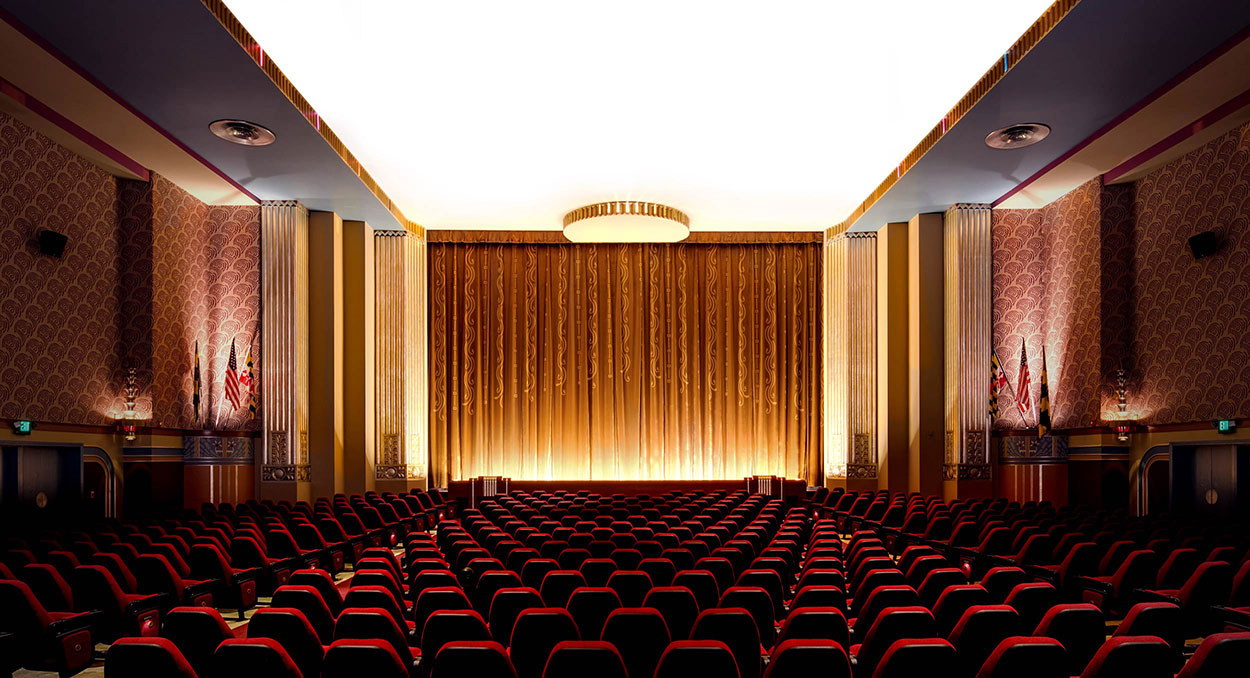

[Image Source](https://thesenatortheatre.com/)

Over the course of this project, you will:

* Part 1: Create your project repository, download IMDB’s movie data and filter out the subset of movies requested by the stakeholder.
* Part 3: Design a MySQL database database for your data and inserting the data.
* Part 3: Use an API to extract box office financial data and load it into your database.
* Part 4: Apply hypothesis testing to explore what makes a movie "successful".

**Part 3A: Your Stakeholder Wants More Data!**

After investigating the preview of your database from Parts 1&2, your stakeholder realized that there is no financial information included in the IMDB data (e.g. budget or revenue)!

This will be a major roadblock when attempting to analyze which movies are successful and must be addressed before you will be able to determine which movies are successful.

Your stakeholder identified The Movie Database (TMDB) as a great source of financial data ([https://www.themoviedb.org/](https://www.themoviedb.org/)). Thankfully, TMDB offers a free API for programmatic access to their data!

* Your stakeholder wants you to extract the budget, revenue, and MPAA Rating (G/PG/PG-13/R), which is also called "Certification".

* Note: this process can take a long time and may need to run overnight.

**Specifications - Financial Data**

* Your stakeholder would like you to extract and save the results for movies that meet all of the criteria established in part 1 of the project (You should already have a filtered dataframe saved from part one as a csv file)

* As a proof-of-concept, they requested you perform a test extraction of movies that started in either 2001 or 2002.

* Each year should be saved as a separate .csv.gz file

**Hint: Use the two custom functions from the lessons (Intro to TMDB API, and Efficient TMDB API Calls). Be sure to define these functions prior to calling them in your code!**
* One function will add the certification (MPGG Rating) to movie.info
* The other function will help you append/extend a JSON file with Python

**Confirm Your API Function works!**

* In order to ensure your function for extracting movie data from TMDB is working, test your function on these 2 movie ids: tt0848228 ("The Avengers") and tt0332280 ("The Notebook"). Make sure that your function runs without error and that it returns the correct movie's data for both test ids.
* **Hint: Ideally, you can organize the code segments from the previous lesson to create an outer and inner loop, but if you get stuck, you can complete one year at a time.**

**Exploratory Data Analysis**

Once you have retrieved and saved the final results to separate .csv.gz files:

* Create a new Part 3 - EDA notebook to load in the data and explore the following questions.
* Load and Combine the final API data into 1 DataFrame (see Getting Started tips below).

**Create Visualizations to Answer the Following Questions:**

* How many movies had at least some valid financial information (values > 0 for budget OR revenue)?
* Please exclude any movies with 0's for budget AND revenue from the remaining visualizations.
* How many movies are there in each of the certification categories (G/PG/PG-13/R)?
* What is the average revenue per certification category?
* What is the average budget per certification category?

**Getting Started**

Make sure to read the Efficient API Calls with TMDB lesson and to do the TMDB API calls practice assignment for more information about how to design the inner and outer loop for your API calls.

**Tip: if you've completed the TMDB Practice Assignment from earlier in this chapter**, you've already figured out much of the code for this part of the project!

**Adding the Outer Loop**

These steps must occur before you begin defining the JSON filenames for a specific year! 

You previously had a single YEAR that you used to extract the relevant data and to name the data files accordingly.

To add the outer loop, you will need to create a list of YEARS_TO_GET. This will control our outer loop. We have data from 2000 - 2020 available. If we just want results for the first two years, we will create a YEARS_TO_GET list that only contains those 2 years.

# Define list of years to get from API for outer loop
YEARS_TO_GET = [2001,2002]

**Start the outer loop with a progress bar**

We want to keep track of our progress and ensure our calls are working. The progress bar works within the for statement of the for loop. Note that this will iterate through each year that is defined in the YEARS_TO_GET variable.

**Your Previous Assignment Code Here:**

* Now, all of the other steps/code from the previous practice assignment will all occur WITHIN this new outer loop.

**Combine All API Results**

Tip: Load and Combine the final API data into 1 DataFrame.

To load in all csv.gz files from your API calls for the years you retrieved, you can use the "glob" module to find file names that match a pattern.

For more information, see the optional lesson at the end of week 1 called "(Optional) Use Glob to Load Many Files"

import glob
# Use glob to get all filepaths that match the pattern (*=wildcard)
tmdb_files = sorted(glob.glob("Data/final_tmdb_data*.csv.gz"))
tmdb_files

* You can combine a list comprehension that uses pd.read_csv() with pd.concat to load and combine all of the data at once:

# Use read_csv in a list comprehension and combine with concat to load all files
df = pd.concat([pd.read_csv(f) for f in tmdb_files] )
df

* Note: if you receive an error message from pd.read_csv, try adding "linetermina='\n'":

# Adding lineterminator arg to get around error
df = pd.concat([pd.read_csv(f, lineterminator='\n') for f in files] )

**Now you have your dataframe for performing the final EDA steps to answer the questions listed in the instructions above.**

# Solution

In [1]:
# Install tmdbsimple (run only once)
# pip install tmdbsimple

In [2]:
# Import libraries, packages
import os, time, json
import tmdbsimple as tmdb 

import pandas as pd
from tqdm.notebook import tqdm_notebook

In [3]:
# Define custom functions
def write_json(new_data, filename): 
    """Appends a list of records (new_data) to a json file (filename). 
    Adapted from: https://www.geeksforgeeks.org/append-to-json-file-using-python/"""  
    
    with open(filename,'r+') as file:
        # First we load existing data into a dict.
        file_data = json.load(file)
        ## Choose extend or append
        if (type(new_data) == list) & (type(file_data) == list):
            file_data.extend(new_data)
        else:
             file_data.append(new_data)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file)

In [4]:
# Hint: Use the two custom functions from the lessons (Intro to TMDB API, and Efficient TMDB API Calls). Be sure to define these functions prior to calling them in your code!

In [5]:
# Load TMDB API Key and add to tmdbsimple
with open(r'C:\Users\ASUS TUF\Documents\GitHub\ods-pt-data-enrichment-project\.secret\tmdb_api.json') as f:
    login = json.load(f)
print(login.keys())

dict_keys(['api-key'])


In [6]:
# Importing tmdbsimple and setting the API_KEY

import tmdbsimple as tmdb
tmdb.API_KEY =  login['api-key']

In [7]:
# Designate a folder
# Create the folder for saving files (if it doesn't exist)
FOLDER = "Data/"
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)

['.ipynb_checkpoints',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'final_tmdb_data_2002.csv.gz',
 'final_tmdb_data_2003.csv.gz',
 'final_tmdb_data_2004.csv.gz',
 'final_tmdb_data_2005.csv.gz',
 'final_tmdb_data_2006.csv.gz',
 'final_tmdb_data_2007.csv.gz',
 'final_tmdb_data_2008.csv.gz',
 'final_tmdb_data_2009.csv.gz',
 'final_tmdb_data_2010.csv.gz',
 'final_tmdb_data_2011.csv.gz',
 'final_tmdb_data_2012.csv.gz',
 'final_tmdb_data_2013.csv.gz',
 'final_tmdb_data_2014.csv.gz',
 'final_tmdb_data_2015.csv.gz',
 'final_tmdb_data_2016.csv.gz',
 'final_tmdb_data_2017.csv.gz',
 'final_tmdb_data_2018.csv.gz',
 'final_tmdb_data_2019.csv.gz',
 'final_tmdb_data_2020.csv.gz',
 'final_tmdb_data_all.csv',
 'final_tmdb_data_all.csv.gz',
 'title-akas-us-only.csv',
 'title-basics-us-only.csv',
 'title-ratings-us-only.csv',
 'title.basics.tsv.gz',
 'title.ratings.tsv.gz',
 'tmdb_api_results_2000.json',
 'tmdb_api_results_2001.json',
 'tmdb_api_results_2002.json',
 'tmdb_api_results

**If you created the data folder for part 1, you will see your csv files listed here. If not, it will just be empty [].**

**Define Your Functions**

You should ultimately put any custom functions at the top of your notebook. You can first write them where you first use them in your project, but once you have the functions completed and tested, you should move their definitions to the top of your notebook after you import your packages.

You will need your function to get the movie rating from the prior lesson, as well as the new function below: write_json. This is a modified version of a function from [https://www.geeksforgeeks.org/append-to-json-file-using-python/](https://www.geeksforgeeks.org/append-to-json-file-using-python/). Notice that the original source link is included in the function's docstring to give proper credit to the original authors.

In [8]:
# Define your functions

# One function will add the certification (MPGG Rating) to movie.info

def get_movie_with_rating(movie_id):
    # Get the movie object for the current id
    movie = tmdb.Movies(movie_id)
    
    # save the .info .releases dictionaries
    movie_info = movie.info()
    releases = movie.releases()
    
    # Loop through countries in releases
    for c in releases['countries']:
        # if the country abbreviation==US
        if c['iso_3166_1' ] =='US':
            ## save a "certification" key in the info dict with the certification
            movie_info['certification'] = c['certification']
    return movie_info

# The other function will help you append/extend a JSON file with Python
def write_json(new_data, filename): 
    """Appends a list of records (new_data) to a json file (filename). 
    Adapted from: https://www.geeksforgeeks.org/append-to-json-file-using-python/"""  
    
    with open(filename,'r+') as file:
        # First we load existing data into a dict.
        file_data = json.load(file)
        ## Choose extend or append
        if (type(new_data) == list) & (type(file_data) == list):
            file_data.extend(new_data)
        else:
             file_data.append(new_data)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file)

In [9]:
# Confirm Your API Function works!
# In order to ensure your function for extracting movie data from TMDB is working, test your function on these 2 movie ids: tt0848228 ("The Avengers") and tt0332280 ("The Notebook"). Make sure that your function runs without error and that it returns the correct movie's data for both test ids.

**Load in the Cleaned Title Basics data**

You need to read in the filtered dataframe you created based on the specification of Project 2 Part 1.

You will be filtering out the movies for each year inside the loop, so we will need this loaded and ready to be filtered.

In [10]:
# Load the cleaned Title Basics (from Part 1)
import pandas as pd
basics = pd.read_csv('Data/title-basics-us-only.csv')
basics

,Unnamed: 0,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,34802,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118,"Comedy,Fantasy,Romance"
1,61114,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020.0,NaN,70,Drama
2,67666,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,NaN,122,Drama
3,86793,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,NaN,100,"Comedy,Horror,Sci-Fi"
4,93930,tt0096056,movie,Crime and Punishment,Crime and Punishment,0,2002.0,NaN,126,Drama
...,...,...,...,...,...,...,...,...,...,...
86974,10016149,tt9914942,movie,Life Without Sara Amat,La vida sense la Sara Amat,0,2019.0,NaN,74,Drama
86975,10016544,tt9915872,movie,The Last White Witch,My Girlfriend is a Wizard,0,2019.0,NaN,97,"Comedy,Drama,Fantasy"
86976,10016684,tt9916170,movie,The Rehearsal,O Ensaio,0,2019.0,NaN,51,Drama
86977,10016693,tt9916190,movie,Safeguard,Safeguard,0,2020.0,NaN,95,"Action,Adventure,Thriller"


**IMPORTANT NOTE**

**Adding the Outer Loop**

In order to convert your code from the TMDB API Practice assignment, where you looped through a year's list of movie_ids to extract the data with the TMDB API, you will need to insert a few steps before your start the inner loop of API calls.

These steps must occur before you begin defining the JSON filenames for a specific year! 

You previously had a single YEAR that you used to extract the relevant data and to name the data files accordingly.

To add the outer loop, you will need to create a list of YEARS_TO_GET. This will control our outer loop. We have data from 2000 - 2020 available. If we just want results for the first two years, we will create a YEARS_TO_GET list that only contains those 2 years.

**Let's do the API calls for years 2001 to 2020**

In [11]:
# Define list of years to get from API for outer loop (I already skipped 2000, 2001, 2002, 2010) which I did separately earlier
YEARS_TO_GET = [2003,2004, 2005, 2006, 2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,2021]

# Create an empty list for saving errors
errors = []

***IF YOU GET STUCK WITH THE LOOP, CONSIDER RUNNING THEM ONE BY ONE***

**The OUTER Loop:**

Create an OUTER loop to loop through each year in your list of years, using a progress bar using tqdm_notebook

**Start the outer loop with a progress bar**

We want to keep track of our progress and ensure our calls are working. The progress bar works within the for statement of the for loop. Note that this will iterate through each year that is defined in the YEARS_TO_GET variable.

**Your Previous Assignment Code Here:**
    
* Now, all of the other steps/code from the previous practice assignment will all occur WITHIN this new outer loop.

Define a JSON filename that includes the year in the filename. This is where you will save the results in progress.

In [ ]:
# Start of OUTER loop
for YEAR in tqdm_notebook(YEARS_TO_GET, desc='YEARS', position=0):
    
    #Defining the JSON file to store results for year
    JSON_FILE = f'{FOLDER}tmdb_api_results_{YEAR}.json'
    
    ## Check if JSON_FILE exists
    file_exists = os.path.isfile(JSON_FILE)
    print(f'{JSON_FILE} status {file_exists}')
    
    # If it does not exist: create it
    if file_exists == False:
    
    # save an empty dict with just "imdb_id" to the new json file.
        with open(JSON_FILE,'w') as f:
            json.dump([{'imdb_id':0}],f)
    
        #Saving new year as the current df
        df = basics.loc[ basics['startYear']==YEAR].copy()
        # saving movie ids to list
        movie_ids = df['tconst'].copy()
    
        # Load existing data from json into a dataframe called "previous_df"
        previous_df = pd.read_json(JSON_FILE)
    
        # filter out any ids that are already in the JSON_FILE
        movie_ids_to_get = movie_ids[~movie_ids.isin(previous_df['imdb_id'])]
    
        #Get index and movie id from list
        # INNER Loop
        for movie_id in tqdm_notebook(movie_ids_to_get,
                                  desc=f'Movies from {YEAR}',
                                  position=1,
                                  leave=True):
            try:
                # Retrieve then data for the movie id
                temp = get_movie_with_rating(movie_id)  
                # Append/extend results to existing file using a pre-made function
                write_json(temp,JSON_FILE)
                # Short 20 ms sleep to prevent overwhelming server
                time.sleep(0.02)
            
            except Exception as e:
                errors.append([movie_id, e])
    
    final_year_df = pd.read_json(JSON_FILE)
    final_year_df.to_csv(f"{FOLDER}final_tmdb_data_{YEAR}.csv.gz",
                         compression="gzip", index=False)

YEARS:   0%|          | 0/18 [00:00<?, ?it/s]

Data/tmdb_api_results_2003.json status True
Data/tmdb_api_results_2004.json status True
Data/tmdb_api_results_2005.json status True
Data/tmdb_api_results_2006.json status True
Data/tmdb_api_results_2007.json status True
Data/tmdb_api_results_2008.json status True
Data/tmdb_api_results_2009.json status True
Data/tmdb_api_results_2011.json status True
Data/tmdb_api_results_2012.json status True
Data/tmdb_api_results_2013.json status True
Data/tmdb_api_results_2014.json status True
Data/tmdb_api_results_2015.json status True
Data/tmdb_api_results_2016.json status True
Data/tmdb_api_results_2017.json status True
Data/tmdb_api_results_2018.json status True
Data/tmdb_api_results_2019.json status True
Data/tmdb_api_results_2020.json status True
Data/tmdb_api_results_2021.json status False


Movies from 2021:   0%|          | 0/5163 [00:00<?, ?it/s]

In [ ]:
# # Set the year to filter for 2001
# YEAR = 2002

# # Create an empty list for saving errors
# errors = []

In [ ]:
# # Define the JSON file to store results for the year
# JSON_FILE = f'{FOLDER}tmdb_api_results_{YEAR}.json'

# # Check if the JSON file exists
# file_exists = os.path.isfile(JSON_FILE)
   
# # If it does not exist: create it
# if file_exists == False:
#     print(f"Creating {JSON_FILE} for API results for year={YEAR}.")
    
#     # save an empty dict with just "imdb_id" to the new json file.
#     with open(JSON_FILE,'w') as f:
#         json.dump([{'imdb_id':0}],f)

# # If it exists, print a message
# else:
#     print(f'The file {JSON_FILE} already exists.')

* Filter for the selected year and save the movie ids**

For the project, you will be breaking up the title_basics data by year. For this practice assignment, we will only be extracted data for the year 2010.

We will create a new DataFrame by filtering title_basics for the selected YEAR. We will then save the list of movie_ids as a separate variable.

**Check previous results and create the final list of movie_ids_to_get**

You may remember from our lesson on efficient API calls that we are going to build in some safeguards when looping through multiple calls.

    * Load in any existing API results with pd.read_json
    * Check to see if any of the movie_ids to get are already in the JSON file.
    * Filter out only movies that are missing from the JSON file to use in the loop

The code loads any existing information from the JSON file into a dataframe called the "previous_df." This will start empty, but as you iterate through the loop, it will continue to have more and more information.

**Check for and filter out movie IDs that already exist**

The next line of code will prevent you from wasting API calls on data you already have. Note that it is defining the ids you are calling in such a way that it excludes any ids that are already present in the previous_df. You may recall that this will also allow you to "pick up where you left off" if your API call gets interrupted.

**Start Loop Through Movie IDs**

Now that we have the filtered list of movie_ids_to_get for the current year, we will now create an inner loop to iterate through the movie_ids_to_get, and for each ID, we will: retrieve the movie info from the TMDB API, append the movie_info dictionary to our JSON_FILE, wait 20 ms to avoid overwhelming the API.

**Set up Progress Bar*

We want to keep track of our progress and ensure our calls are working. The progress bar works within the for statement of the for loop. Note that this will iterate through each year that is defined in the YEARS_TO_GET variable.

Ultimately we will be creating a loop, but let's explore each piece of the code:

**Iterate through the list of Movie IDs and make the calls**

The code below relies on the function you wrote in the previous lesson that made API calls and added the certification to the .info results. Here this function is named "get_movie_with_rating". Make sure you have the function from the earlier lesson in the code file before you plan to call on it! This loop also uses the function above (write_json) to extend/append the results to the .json file. **Make sure both functions are defined in your code file before you try to call them!**

Since some movies exist in IMDB's title basics dataset (our DataFrame) that do not exist within the database for TMDB's API, we will get an error whenever we attempt to retrieve a movie id that TMDB does not have in its database.

To get around this, we will use a try and except statement around our API extraction code. We will TRY to retrieve and save the data for the current movie_id, but if we get an error, we will save the movie_id and error message in our errors list.

**After the Loop**

*Print a message reporting back the number of movie ids that caused an error.

In [ ]:
# print(f"- Total errors: {len(errors)}")

In [ ]:
# * What I did the practice for 2000, 2001, and 2010

# # Set the year to filter for 2000
# YEAR = 2000

# # Create an empty list for saving errors
# errors = []

In [ ]:
# # Define the JSON file to store results for the year
# JSON_FILE = f'{FOLDER}tmdb_api_results_{YEAR}.json'

# # Check if the JSON file exists
# file_exists = os.path.isfile(JSON_FILE)
   
# # If it does not exist: create it
# if file_exists == False:
#     print(f"Creating {JSON_FILE} for API results for year={YEAR}.")
    
#     # save an empty dict with just "imdb_id" to the new json file.
#     with open(JSON_FILE,'w') as f:
#         json.dump([{'imdb_id':0}],f)

# # If it exists, print a message
# else:
#     print(f'The file {JSON_FILE} already exists.')

In [ ]:
# # filter out any ids that are already in the JSON_FILE
# movie_ids_to_get = movie_ids[~movie_ids.isin(previous_df['imdb_id'])]

In [ ]:
# # Loop through movie_ids_to_get with a tqdm progress bar
# for movie_id in tqdm_notebook(movie_ids_to_get, f"Movies from {YEAR}"):

#     # Attempt to retrieve then data for the movie id
#     try:
#         temp = get_movie_with_rating(movie_id)  #This uses your pre-ma    de function
#         # Append/extend results to existing file using a pre-made function
#         write_json(temp,JSON_FILE)
#         # Short 20 ms sleep to prevent overwhelming server
#         time.sleep(0.02)

#     # If it fails,  make a dict with just the id and None for certification.
#     except Exception as e:
#         errors.append([movie_id, e])

In [ ]:
# print(f"- Total errors: {len(errors)}")

In [ ]:
# # Save the final results to a csv.gz file
# final_year_df = pd.read_json(JSON_FILE)

# csv_fname = f"{FOLDER}final_tmdb_data_{YEAR}.csv.gz"
# final_year_df.to_csv(csv_fname, compression="gzip", index=False)

In [ ]:
# # Load existing data from json into a dataframe called "previous_df"
# previous_df = pd.read_json(JSON_FILE)
# previous_df

Once the inner loop through the movie_ids_to_get has finished, we will have all of our results for that year in our JSON_FILE. We now want to save them in a smaller file format.

Save the year's results as csv.gz file

Once all of the API calls for the current year are made, you should open your .json file with pd.read_json and convert each json file to a compressed csv (".csv.gz") to save space. This is done after the loop.

**Combine All API Results**

**Tip: Load and Combine the final API data into 1 DataFrame.** 

* To load in all csv.gz files from your API calls for the years you retrieved, you can use the "glob" module to find file names that match a pattern.
    * For more information, see the optional lesson at the end of week 1 called "(Optional) Use Glob to Load Many Files"

## **RERUN FROM HERE TO COMBINE ALL TMDB API FILES**

In [ ]:
import glob

# Use glob to get all filepaths that match the pattern (*=wildcard)

tmdb_files = sorted(glob.glob("Data/final_tmdb_data*.csv.gz"))
tmdb_files

* You can combine a list comprehension that uses pd.read_csv() with pd.concat to load and combine all of the data at once:

In [ ]:
# Use read_csv in a list comprehension and combine with concat to load all files
df = pd.concat([pd.read_csv(f) for f in tmdb_files] )
df

**Note: if you receive an error message from pd.read_csv, try adding "linetermina='\n'":**

In [ ]:
## Adding lineterminator arg to get around error
# df = pd.concat([pd.read_csv(f, lineterminator='\n') for f in files] )

# **Now you have your dataframe for performing the final EDA steps to answer the questions listed in the instructions above.**

In [ ]:
# Save the COMBINED data to a CSV file in your Data folder.
df.to_csv("Data/final_tmdb_data_all.csv.gz")
df.to_csv("Data/final_tmdb_data_all.csv")